<a href="https://colab.research.google.com/github/ch00226855/CMP414765Spring2022/blob/main/MidtermSpring2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMP 414/765 Mid-Term Project 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg" width="300">

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

For the mid-term project, we will work with the [Titanic dataset](https://www.kaggle.com/c/titanic) on Kaggle.com. In this project, you will get to apply machine learning tools to analyze the passenger information from the training set, and analyze what factors may affect a passenger's chance for survival. **You are expected to submit a complete Jupyter notebook with python code (including detailed comments), numerical results, and graphs (with proper labeling) to Blackboard.** The submission deadline is **Sunday, April 24th**.


# Stage I: Data Exploration


(1) Download the training data from https://www.kaggle.com/c/titanic/data as a CSV file.

(2) Load the training dataset as a Pandas DataFrame. 

In [489]:
import pandas as pd
import numpy as np
# Load train dataset
train_dataset = pd.read_csv('train.csv')
# Dataframe
data = pd.concat([train_dataset], ignore_index=True, sort=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(3) Obtain basic information of variables. For each variable, find out:
1. What does this variable represent
2. The meaning of values
3. Numerical summary
4. Graphical distributions of values


In [490]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [491]:
    # numrical summary:
    print(data.describe())
    print('')

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



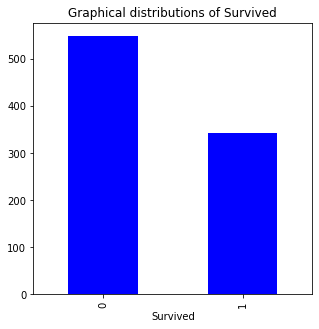

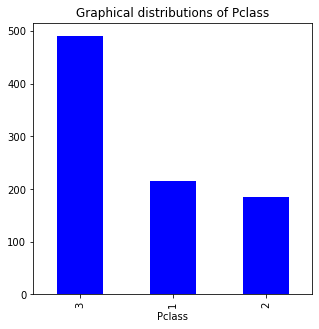

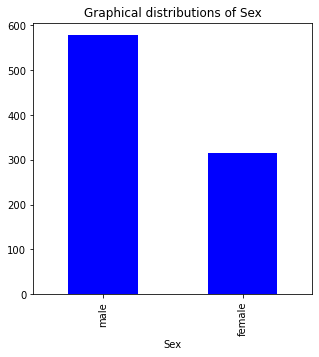

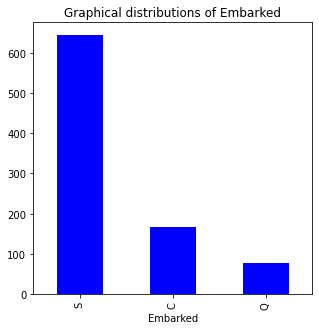

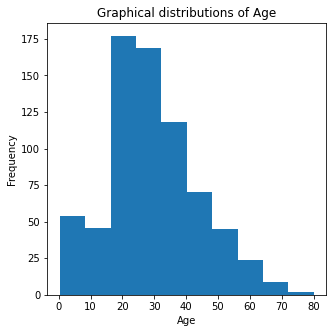

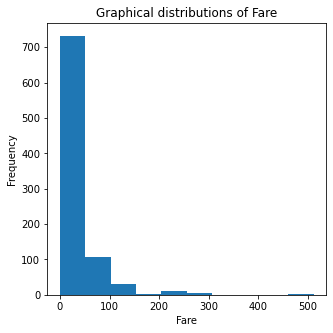

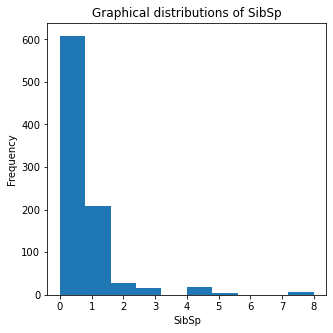

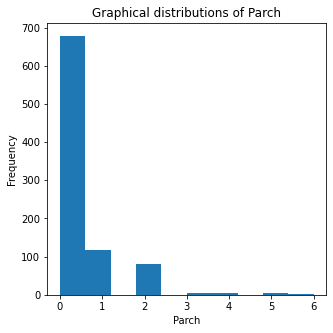

In [492]:
# Graphical distributions of values
# for categorical variables we will use bar plots and for continuous varibles we will use histograms:
import matplotlib.pyplot as plt
%matplotlib inline
# figure for bar graphs
def bar_graph(dataset, cols):
    for col in cols:
        fig = plt.figure(figsize=(5, 5))
        ax = fig.gca()
        num = dataset[col].value_counts()
        num.plot.bar(ax=ax, color='blue')
        ax.set_title('Graphical distributions of '+col)
        ax.set_xlabel(col)
        plt.show()
# figure for histograms
def hist_graph(dataset, cols, bins=10):
    for col in cols:
        fig = plt.figure(figsize=(5, 5))
        ax = fig.gca()
        dataset[col].plot.hist(ax=ax, bins=bins)
        ax.set_title('Graphical distributions of '+col)
        ax.set_xlabel(col)
        plt.show()

bar_graph(data, ['Survived', 'Pclass', 'Sex', 'Embarked'])
hist_graph(data, ['Age', 'Fare', 'SibSp', 'Parch'])

In [493]:
# find missing values:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(4) Data Cleaning

Discard all passengers with incomplete information may significantly reduce the number of data example. Please handle the missing value problem in the following way:
1. Remove all columns that contain more than 5% missing values.
2. After Step 1, remove any row that has missing values.



In [494]:
# drop cabin column as most values are null:
data.drop(['Cabin'], axis=1, inplace=True)
# fill age and fare null values with mean vlue and Embarked with the most frequent value:
data[['Age', 'Fare', 'Embarked']] = data[['Age',
                                          'Fare',
                                          'Embarked']].fillna({'Age': data['Age'].mean(),
                                                               'Fare': data['Fare'].mean(),'Embarked': data['Embarked'].mode()[0]})

In [495]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


(5) Prediction Power
A good model should only include variables that are indeed related to the task. Use correlation coefficients and scatter plots to decide which variables have strong relationship to passengers’ survival, and which don’t. 


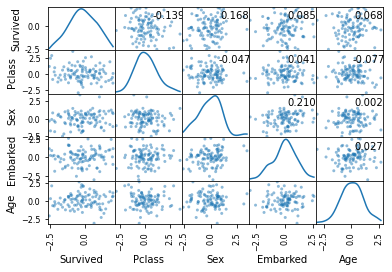

In [496]:
# All scatter plots
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(100, 5), columns=['Survived', 'Pclass', 'Sex', 'Embarked','Age'])
axes = scatter_matrix(df, alpha=0.5, diagonal='kde')
corr = df.corr().to_numpy()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()
# Based on the information on the scatter plots, age, sex, and pclass had the strongest relationship to the passengers survival.

(6) (optional) You may think that the name feature is irrelevant. However, a closer look at the names will show that some passengers have rare titles such as Dr., Mme, or Master., which indicates their high social status. Please create a column to indicate whether a passenger has a rare title.

## Stage II: Model Construction

(1) Converting Categorical Features

1. Sex in the original dataset is categorial, and thus cannot be directly fed into Machine Learning models. Please convert the categories into 0’s and 1’s.
2. Embarked is also categorical. However, it is not ideal to simply convert the three categories into 0, 1, and 2, since it creates a bias by imposing an order to the values. Instead, we can add an indicator variable (also known as a dummy variable) for each category separately. Please replace the Embarked variable with three variables – Embarked_S, Embarked_C, and Embarked_Q – to indicate the place a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embarked_S should be set to 1, and Embarked_C and Embarked_Q should be zero. ([pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) can help you with this)


In [497]:
# convert sex 'roles' column into 0’s and 1’s:
role = {'male': 0, 'female': 1}
data['Sex'] = [role[x] for x in data['Sex']]

# replace Embarked variable with – Embark_S, Embark_C, and Embark_Q:
data = pd.concat([data, pd.get_dummies(data['Embarked'], prefix='Embarked')], axis=1)
data.drop(['Embarked'], axis=1, inplace=True)

(2) Feature Scaling

Machine learning models usually work best on datasets whose variables have similar ranges. Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this).

In [498]:
from sklearn.preprocessing import StandardScaler
# make type of all numbers float:
data[data.select_dtypes(exclude=['object']).columns] = data[data.select_dtypes(exclude=['object']).columns].astype(float)
# Feature Scaling:
scaler = StandardScaler()
data[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(data[['Age', 'Fare', 'SibSp', 'Parch']])

(3) Extract Validation set

Because the test dataset from the website has no information on survival, it cannot be used to evaluate the performance of the model. As a result, we need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. (`sklearn.model_selection.train_test_split()` can help you with this)

In [499]:
# Split the dataset into training set and validation set:
import sklearn.model_selection as ms
import numpy as np
# choose only helpful features:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
             'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

train_data = data[data['Survived'].notnull()]
train_features = np.array(train_data[['Pclass', 'Sex', 'Age', 'SibSp',
                                      'Parch', 'Fare', 'Embarked_C', 
                                      'Embarked_Q', 'Embarked_S']])

Labels = np.array(train_data['Survived'])
# split train data into train and validation sets:
validation = range(train_data.shape[0])
validation = ms.train_test_split(validation, test_size = 0.2)
X_train = train_features[validation[0],:]
y_train = np.ravel(Labels[validation[0]])
X_val = train_features[validation[1],:]
y_val = np.ravel(Labels[validation[1]])

(4) (Optional: Feature Engineering)

Previously we noticed that some passengers’ names have rare titles, which may indicate their unusual social status. Extracting a new feature from existing data is called feature engineering. Another interesting thing you may observed is that some passenger got on board for free! This could also be a potential indicator of the social status of the passenger. Please create an indicator variable on whether a person paid for the ticket.

(5) Building Models

So far, we have learned five models: linear regression, polynomial regression, logistic regression, k-nearest neighbors method, and linear support vector machine. Choose at least two models that are suitable for this problem and use corresponding sklearn classes to fit the data. Note that each model class has several parameters, you are welcome to change the default parameter values and try to improve the performance of the model.


In [500]:
# Model 1
# Building models:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [501]:
# Evaluate the models:
import sklearn.metrics as sklm

predictions = model.predict(X_val)

metrics = sklm.precision_recall_fscore_support(y_val, predictions)

from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, train_pred)
recall = recall_score(y_train, train_pred)
f1 = f1_score(y_train, train_pred)
print('precision %0.2f' % float(precision_score(y_val, predictions)))
print('recall    %0.2f' % float(recall_score(y_val, predictions)))
print('F1        %0.2f' % float(f1_score(y_val, predictions)))
print('Accuracy  %0.2f' % sklm.accuracy_score(y_val, predictions))
print(' ')
print(' Positive       Negative')
print('|----------------------|')
print('|Num case              |')   
print('|%6d' % metrics[3][1] + '        %6d' % metrics[3][0] + '  |')
print('|Precision             |')
print('|%6.2f' %  metrics[0][1] + '        %6.2f' % metrics[0][0] + '  |' )
print('|Recall                |')
print('|%6.2f' %  metrics[1][1] + '        %6.2f' % metrics[1][0] + '  |')
print('|F1                    |')         
print('|%6.2f' %  metrics[2][1] + '        %6.2f' % metrics[2][0] + '  |')
print('|----------------------|')
conf = sklm.confusion_matrix(y_val, predictions)
print(' Positive          Negative')
print('Actual positive')    
print('%6d' % conf[1,1] + '             %5d' % conf[1,0])
print('Actual negative')    
print('%6d' % conf[0,1] + '             %5d' % conf[0,0])


precision 0.78
recall    0.71
F1        0.74
Accuracy  0.79
 
 Positive       Negative
|----------------------|
|Num case              |
|    75           104  |
|Precision             |
|  0.78          0.80  |
|Recall                |
|  0.71          0.86  |
|F1                    |
|  0.74          0.83  |
|----------------------|
 Positive          Negative
Actual positive
    53                22
Actual negative
    15                89


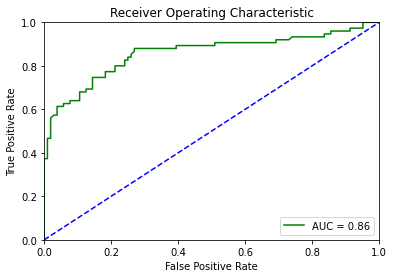

In [502]:
# Graphical representation
probs = model.predict_proba(X_val)
fpr, tpr, threshold = sklm.roc_curve(y_val, probs[:,1])
auc = sklm.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color = 'green', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [503]:
X = data.iloc[:,1:5].values
Y = data.iloc[:,0].values

In [504]:
# building model 2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=4)

In [505]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [506]:
# Model 2
# Build models:
k_range = range(1,26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)

[0.7535014005602241, 0.7815126050420168, 0.8011204481792717, 0.8067226890756303, 0.8375350140056023, 0.8263305322128851, 0.84593837535014, 0.8403361344537815, 0.8487394957983193, 0.8375350140056023, 0.8403361344537815, 0.834733893557423, 0.84593837535014, 0.84593837535014, 0.8375350140056023, 0.8487394957983193, 0.8375350140056023, 0.8431372549019608, 0.834733893557423, 0.8375350140056023, 0.8431372549019608, 0.834733893557423, 0.834733893557423, 0.8291316526610645, 0.8319327731092437]


Text(0, 0.5, 'Testing Accuracy')

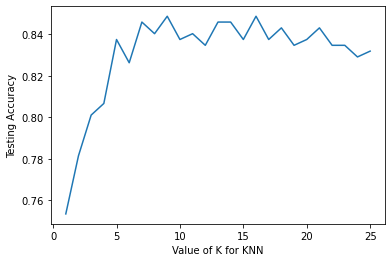

In [507]:
plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [515]:
# Model 3 (extra model)
# Building models:
model_pr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
age_poly = poly_features.fit_transform(X_train)
# print(age_poly)

model_pr.fit(age_poly, y_train)

LinearRegression()

In [509]:
print(model_pr.coef_)
print(model_pr.intercept_)

[-0.05719894  0.34219074 -0.0732368   0.14808319 -0.01853333 -0.08985397
 -0.0165881  -0.05025915  0.34219074  0.06354154 -0.07875794  0.04349023
  0.0474523  -0.00257717]
0.44194649536034947


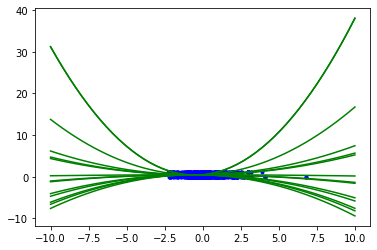

In [510]:
import numpy as np
plt.plot(X_train, y_train, 'b.', alpha=1)
x_coor = np.linspace(-10,10)
beta0 = model_pr.intercept_
beta1 = model_pr.coef_
y_coor = [beta0 + beta1 * x + beta1 * x ** 2 for x in x_coor]
plt.plot(x_coor, y_coor, 'g-')

## Stage III: Model Selection and Interpretation

(1) Model Selection. 

For each model you have trained, perform the following evaluations on the validation set:
1. cross validation
2. confusion matrix
3. precision, and recall 

What is the best model?

In [511]:
param_grid = {"C":[0.01, 0.1, 1, 10, 100, 1000]}

## Perform the grid search over the parameters
clf1 = ms.GridSearchCV(estimator = model, param_grid = param_grid, 
                      cv = 5,
                      scoring = 'roc_auc',
                      return_train_score = True)
clf1.fit(train_features, Labels)
best_C = clf1.best_estimator_.C
print(best_C)

1


In [512]:
# create model with best C:
modelc = LogisticRegression(C=best_C, solver='lbfgs')
modelc.fit(X_train, y_train)

LogisticRegression(C=1)

In [513]:
# evaluate on validation set:

X_train = train_features[validation[0],:]
y_train = np.ravel(Labels[validation[0]])
X_val = train_features[validation[1],:]
y_val = np.ravel(Labels[validation[1]])

val_pred = model.predict(X_val)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, train_pred)
recall = recall_score(y_train, train_pred)
f1 = f1_score(y_train, train_pred)
print('precision %0.2f' % float(precision_score(y_val, val_pred)))
print('recall    %0.2f' % float(recall_score(y_val, val_pred)))
print('F1    %0.2f' % float(f1_score(y_val, val_pred)))
print('Accuracy        %0.2f' % sklm.accuracy_score(y_val, val_pred))

precision 0.78
recall    0.71
F1    0.74
Accuracy        0.79


In [514]:
# Evaluate on training set:
train_pred = model.predict(X_train)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, train_pred)
recall = recall_score(y_train, train_pred)
f1 = f1_score(y_train, train_pred)
print('precision %0.2f' % float(precision_score(y_train, train_pred)))
print('recall    %0.2f' % float(recall_score(y_train, train_pred)))
print('F1    %0.2f' % float(f1_score(y_train, train_pred)))
print('Accuracy        %0.2f' % sklm.accuracy_score(y_train, train_pred))

precision 0.78
recall    0.69
F1    0.73
Accuracy        0.81


(2) Model Interpretation.

Based on the model that you have selected, can you identify a few key variables that are important in predicting the survival of the passengers? Try to find out which characteristics can improve passengers’ chance of survival.


(3) (optional) Submit Results to Kaggle.com
Make predictions on the test set, submit your results to Kaggle.com. 